In [40]:
%pip install pandas
%pip install tensorflow
%pip install sklearn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cause_data = pd.read_csv("root_cause_analysis.csv")

cause_data.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [42]:
cause_data[['ROOT_CAUSE']].describe()

,ROOT_CAUSE
count,1000
unique,3
top,DATABASE_ISSUE
freq,340


In [133]:
cause_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   CPU_LOAD          1000 non-null   int64 
 2   MEMORY_LEAK_LOAD  1000 non-null   int64 
 3   DELAY             1000 non-null   int64 
 4   ERROR_1000        1000 non-null   int64 
 5   ERROR_1001        1000 non-null   int64 
 6   ERROR_1002        1000 non-null   int64 
 7   ERROR_1003        1000 non-null   int64 
 8   ROOT_CAUSE        1000 non-null   object
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [134]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder() #string to numerical
cause_data['ROOT_CAUSE'] = label_encoder.fit_transform(
    cause_data['ROOT_CAUSE']
)



In [155]:
y = cause_data[['ROOT_CAUSE']]
y.head()

,ROOT_CAUSE
0,1
1,1
2,1
3,1
4,2


In [156]:
y = tf.keras.utils.to_categorical(y, 3)
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [157]:
predictors = list(cause_data.columns)
predictors

['ID',
 'CPU_LOAD',
 'MEMORY_LEAK_LOAD',
 'DELAY',
 'ERROR_1000',
 'ERROR_1001',
 'ERROR_1002',
 'ERROR_1003',
 'ROOT_CAUSE']

In [158]:
predictors.remove('ROOT_CAUSE')
predictors.remove('ID')
predictors

['CPU_LOAD',
 'MEMORY_LEAK_LOAD',
 'DELAY',
 'ERROR_1000',
 'ERROR_1001',
 'ERROR_1002',
 'ERROR_1003']

In [159]:
x = cause_data[predictors]
x.head()

,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,1
2,0,1,1,0,0,1,1
3,0,1,0,1,1,0,1
4,1,1,0,1,0,1,0


In [160]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                     test_size=0.10)

In [161]:
x_train.shape

(900, 7)

In [162]:
y_train.shape

(900, 3)

In [163]:
x_test.shape

(100, 7)

In [164]:
y_test.shape

(100, 3)

In [165]:
from tensorflow import keras

NB_CLASSES = 3

In [184]:
model = tf.keras.models.Sequential() #Create model
model.add(keras.layers.Dense(128,
                             input_shape = (7,),
                             name='Hidden-Layer-1',
                             activation='relu')) #First

model.add(keras.layers.Dense(128,
                             name='Hidden-Layer-2',
                             activation='relu')) #Second

model.add(keras.layers.Dense(64,
                             name='Hidden-Layer-3',
                             activation='relu')) #Second

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax')) #Output

In [185]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               1024      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Hidden-Layer-3 (Dense)      (None, 64)                8256      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 25987 (101.51 KB)
Trainable params: 25987 (101.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [211]:
VERBOSE = 1

#Hyperparameters

BATCH_SIZE = 64
EPOCHS = 20
VALIDATIN_SPLIT = 0.2

In [212]:
#Fit model
history = model.fit(x_train,
                    y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATIN_SPLIT)

Epoch 1/20
12/12 [==============================] - 0s 6ms/step - loss: 0.2789 - accuracy: 0.8653 - val_loss: 0.2866 - val_accuracy: 0.8611
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.2784 - accuracy: 0.8625 - val_loss: 0.2844 - val_accuracy: 0.8444
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 0.2762 - accuracy: 0.8583 - val_loss: 0.2931 - val_accuracy: 0.8500
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.2779 - accuracy: 0.8653 - val_loss: 0.2908 - val_accuracy: 0.8444
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.8708 - val_loss: 0.2981 - val_accuracy: 0.8389
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2748 - accuracy: 0.8667 - val_loss: 0.2862 - val_accuracy: 0.8500
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2760 - accuracy: 0.8611 - val_loss: 0.3426 - val_accuracy: 0.8389
Epoch 8/20
12/12 [==

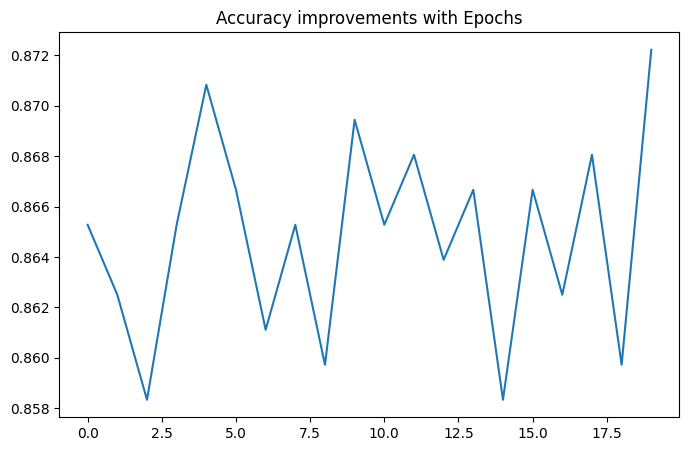

In [213]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with Epochs")
plt.show()

In [214]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8300


[0.34013691544532776, 0.8299999833106995]

In [216]:
import numpy as np

CPU_LOAD=1
MEMORY_LOAD=0
DELAY=0
ERROR_1000=0
ERROR_1001=1
ERROR_1002=1
ERROR_1003=0

prediction=np.argmax(model.predict(
    [[CPU_LOAD,MEMORY_LOAD,DELAY,
      ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]]), axis=1 )

print(label_encoder.inverse_transform(prediction))

1/1 [==============================] - 0s 30ms/step
['DATABASE_ISSUE']


In [231]:
import random

N = 10
#[CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]
for i in range(N):
    prediction=np.argmax(model.predict(
    [[random.randint(0,1),random.randint(0,1),random.randint(0,1),
      random.randint(0,1),random.randint(0,1),random.randint(0,1),
      random.randint(0,1)]]), axis=1 )
    
    print(label_encoder.inverse_transform(prediction))

1/1 [==============================] - 0s 34ms/step
['DATABASE_ISSUE']
1/1 [==============================] - 0s 35ms/step
['NETWORK_DELAY']
1/1 [==============================] - 0s 34ms/step
['DATABASE_ISSUE']
1/1 [==============================] - 0s 32ms/step
['DATABASE_ISSUE']
1/1 [==============================] - 0s 32ms/step
['DATABASE_ISSUE']
1/1 [==============================] - 0s 29ms/step
['DATABASE_ISSUE']
1/1 [==============================] - 0s 30ms/step
['MEMORY_LEAK']
1/1 [==============================] - 0s 33ms/step
['NETWORK_DELAY']
1/1 [==============================] - 0s 30ms/step
['MEMORY_LEAK']
1/1 [==============================] - 0s 33ms/step
['MEMORY_LEAK']
